In [4]:
#1 what can you conclude about the behaviour or characteristics of users who complete check out vs those who do not?
#Users who completed check out are more likely yo use desktop for shopping. 
#The more page visited, the more checkout rates
#cart value and cart item affect check out rate as well

#2 How did you prepare your data for analysis? 
#Describe your data cleaning and preparation approaches, and why these were the best choices.
#I checked if the data types are correct, all data types are correct. Nothing needed.
#I dropped the missing value for location and device. As the missing value for location and device is relatively small of the whole dataset.
#Besides, these are all object data typle and not float or integer, it would be more efficient to drop these values.
#After analysing the graphs, I used t-test to see if there is indeed a relationship between the two variables


#3 What recommendations do you have for the product team? What should they do next? 
#Nothing to do with location. checkout status is not directly related to location as there is no correlation shows between check out status and location. 
#However, desktop users tend to have more check out status. The product team should increase user experience on desktop users by developing 
#more on desktop platform and web design.
#They should also encourage users to visit pages frequentylt as more page visits leads to higher probililty of purchases by pushing promotion
#notifications and weekly updates
#As cart items and cart values affect checkout status, the product team should limit users shopping cart items. Users can only add up to 20 items
#at a time. When their cart values reach a certain amount, such as 100 (100 is close to the lowest amount people tend to make the purchase) 
#the product team can provide users with free gifts or free shipping to urge users to make the purchases.

In [5]:
import pandas as pd
import seaborn as sns


In [6]:
df = pd.read_csv('/Users/youziya/Downloads/midterm_data.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


In [8]:
df.head()

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4


In [9]:
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


In [12]:
df.drop(df[df['device'].isnull() & df['location'].isnull()].index, axis=0, inplace=True)

In [13]:
df.describe(include='all')

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,2500.573915,41.542509,5.027205,25.159160,5.774355,14.965593,149.424353,0.272454,NaN,NaN
std,1443.654943,14.040833,2.595218,9.826407,2.571097,6.046672,68.705704,0.445267,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.500000,29.000000,3.000000,18.267083,4.000000,10.000000,92.465000,0.000000,NaN,NaN
50%,2501.000000,42.000000,5.000000,25.036202,6.000000,15.000000,143.340000,0.000000,NaN,NaN
75%,3750.500000,54.000000,7.000000,32.001153,8.000000,20.000000,198.330000,1.000000,NaN,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4999 non-null   int64  
 1   age              4999 non-null   int64  
 2   sessions         4999 non-null   int64  
 3   time_spent       4999 non-null   float64
 4   pages_visited    4999 non-null   int64  
 5   cart_items       4999 non-null   int64  
 6   cart_value       4999 non-null   float64
 7   checkout_status  4999 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 429.6+ KB


In [15]:
df[df['device'].isnull() & df['location'].isnull()]

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location


In [27]:
df.dropna(subset=['device', 'location'], inplace=True)

In [16]:
df_test = df.copy()

In [18]:
df_test.groupby('device').describe()

userID                                                           \
          count         mean          std  min      25%     50%      75%   
device                                                                     
Desktop  2538.0  2481.464933  1435.264432  1.0  1260.25  2497.5  3733.75   
Mobile   1428.0  2518.448880  1457.420581  7.0  1236.75  2512.5  3807.75   
Tablet    934.0  2534.595289  1452.234322  5.0  1271.25  2513.0  3753.25   

                    age             ... cart_value         checkout_status  \
            max   count       mean  ...        75%     max           count   
device                              ...                                      
Desktop  4999.0  2538.0  41.338849  ...   197.2450  427.40          2538.0   
Mobile   4991.0  1428.0  41.724790  ...   201.6100  387.98          1428.0   
Tablet   5000.0   934.0  41.844754  ...   197.7025  377.98           934.0   

                                                      
             mean       std  min  25%  50%  75%  max  
device                                                
Desktop  0.285264  0.451629  0.0  0.0  0.0  1.0  1.0  
Mobile   0.264706  0.441331  0.0  0.0  0.0  1.0  1.0  
Tablet   0.254818  0.435992  0.0  0.0  0.0  1.0  1.0  

[3 rows x 64 columns]

In [19]:
df_test.groupby('location').describe()

userID                                                          \
             count         mean          std  min      25%     50%     75%   
location                                                                     
Location 1   979.0  2428.888662  1460.439111  1.0  1115.00  2431.0  3683.5   
Location 2   950.0  2495.070526  1413.792983  4.0  1335.50  2517.0  3674.0   
Location 3  1014.0  2477.388560  1437.144060  2.0  1248.25  2378.5  3712.5   
Location 4  1056.0  2508.631629  1470.328379  3.0  1219.50  2517.5  3796.0   
Location 5   971.0  2598.049434  1434.875326  6.0  1352.50  2664.0  3849.0   

                       age             ... cart_value         checkout_status  \
               max   count       mean  ...        75%     max           count   
location                               ...                                      
Location 1  4995.0   979.0  42.291113  ...   199.9500  394.77           979.0   
Location 2  4997.0   950.0  41.648421  ...   198.9475  357.77           950.0   
Location 3  5000.0  1014.0  41.763314  ...   195.4400  427.40          1014.0   
Location 4  4998.0  1056.0  40.892992  ...   199.5425  353.80          1056.0   
Location 5  4999.0   971.0  41.085479  ...   197.7800  359.00           971.0   

                                                         
                mean       std  min  25%  50%  75%  max  
location                                                 
Location 1  0.282942  0.450659  0.0  0.0  0.0  1.0  1.0  
Location 2  0.266316  0.442264  0.0  0.0  0.0  1.0  1.0  
Location 3  0.261341  0.439582  0.0  0.0  0.0  1.0  1.0  
Location 4  0.284091  0.451194  0.0  0.0  0.0  1.0  1.0  
Location 5  0.266735  0.442481  0.0  0.0  0.0  1.0  1.0  

[5 rows x 64 columns]

In [22]:
df_test['location'] = df_test['location'].fillna('Other')

In [23]:
df_test['device'] = df_test['device'].fillna('Other')

In [24]:
df_test.groupby('location').describe()

userID                                                           \
             count         mean          std   min      25%     50%     75%   
location                                                                      
Location 1   979.0  2428.888662  1460.439111   1.0  1115.00  2431.0  3683.5   
Location 2   950.0  2495.070526  1413.792983   4.0  1335.50  2517.0  3674.0   
Location 3  1014.0  2477.388560  1437.144060   2.0  1248.25  2378.5  3712.5   
Location 4  1056.0  2508.631629  1470.328379   3.0  1219.50  2517.5  3796.0   
Location 5   971.0  2598.049434  1434.875326   6.0  1352.50  2664.0  3849.0   
Other         29.0  2354.379310  1310.371523  60.0  1460.00  2352.0  3325.0   

                       age             ... cart_value         checkout_status  \
               max   count       mean  ...        75%     max           count   
location                               ...                                      
Location 1  4995.0   979.0  42.291113  ...   199.9500  394.77           979.0   
Location 2  4997.0   950.0  41.648421  ...   198.9475  357.77           950.0   
Location 3  5000.0  1014.0  41.763314  ...   195.4400  427.40          1014.0   
Location 4  4998.0  1056.0  40.892992  ...   199.5425  353.80          1056.0   
Location 5  4999.0   971.0  41.085479  ...   197.7800  359.00           971.0   
Other       4951.0    29.0  44.034483  ...   195.4400  237.64            29.0   

                                                         
                mean       std  min  25%  50%  75%  max  
location                                                 
Location 1  0.282942  0.450659  0.0  0.0  0.0  1.0  1.0  
Location 2  0.266316  0.442264  0.0  0.0  0.0  1.0  1.0  
Location 3  0.261341  0.439582  0.0  0.0  0.0  1.0  1.0  
Location 4  0.284091  0.451194  0.0  0.0  0.0  1.0  1.0  
Location 5  0.266735  0.442481  0.0  0.0  0.0  1.0  1.0  
Other       0.275862  0.454859  0.0  0.0  0.0  1.0  1.0  

[6 rows x 64 columns]

In [25]:
df_test.groupby('device').describe()

userID                                                            \
          count         mean          std   min      25%     50%      75%   
device                                                                      
Desktop  2538.0  2481.464933  1435.264432   1.0  1260.25  2497.5  3733.75   
Mobile   1428.0  2518.448880  1457.420581   7.0  1236.75  2512.5  3807.75   
Other      99.0  2411.656566  1386.399927  80.0  1226.00  2379.0  3541.50   
Tablet    934.0  2534.595289  1452.234322   5.0  1271.25  2513.0  3753.25   

                    age             ... cart_value         checkout_status  \
            max   count       mean  ...        75%     max           count   
device                              ...                                      
Desktop  4999.0  2538.0  41.338849  ...   197.2450  427.40          2538.0   
Mobile   4991.0  1428.0  41.724790  ...   201.6100  387.98          1428.0   
Other    4988.0    99.0  41.282828  ...   191.7000  302.48            99.0   
Tablet   5000.0   934.0  41.844754  ...   197.7025  377.98           934.0   

                                                      
             mean       std  min  25%  50%  75%  max  
device                                                
Desktop  0.285264  0.451629  0.0  0.0  0.0  1.0  1.0  
Mobile   0.264706  0.441331  0.0  0.0  0.0  1.0  1.0  
Other    0.222222  0.417855  0.0  0.0  0.0  0.0  1.0  
Tablet   0.254818  0.435992  0.0  0.0  0.0  1.0  1.0  

[4 rows x 64 columns]

In [28]:
# Convert columns to appropriate data types
df['device'] = df['device'].astype('category')
df['location'] = df['location'].astype('category')

df['time_spent_normalized'] = (df['time_spent'] - df['time_spent'].min()) / (df['time_spent'].max() - df['time_spent'].min())

# Feature engineering
df['average_time_spent_per_session'] = df['time_spent'] / df['sessions']
df['cart_abandonment_rate'] = (df['cart_items'] - df['checkout_status']) / df['cart_items']

# Outlier
q_low = df['time_spent'].quantile(0.01)
q_high = df['time_spent'].quantile(0.99)
df['time_spent'] = df['time_spent'].clip(q_low, q_high)

# Print the transformed dataset
print(df.head())


   userID  age  sessions  time_spent  pages_visited  cart_items  cart_value  \
0       1   62         3   13.295129              2          20      199.21   
1       2   65         2   21.686405              3          21      294.82   
2       3   18         7   17.135220              4          23      240.87   
3       4   21         9   29.589311              8          16      183.78   
4       5   21         3   25.948584              4          10       59.51   

   checkout_status   device    location  time_spent_normalized  \
0                0  Desktop  Location 1               0.138148   
1                0  Desktop  Location 3               0.232432   
2                0  Desktop  Location 4               0.181295   
3                1  Desktop  Location 2               0.321228   
4                1   Tablet  Location 4               0.280321   

   average_time_spent_per_session  cart_abandonment_rate  
0                        4.431710                 1.0000  
1         

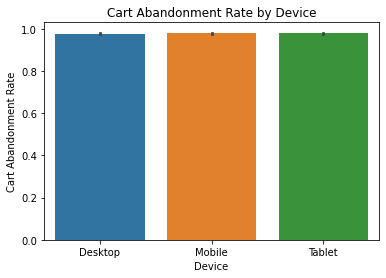

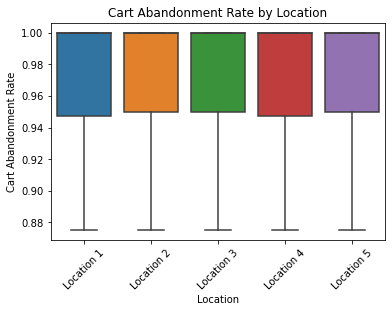

In [33]:
import matplotlib.pyplot as plt


sns.barplot(x='device', y='cart_abandonment_rate', data=df)
plt.title('Cart Abandonment Rate by Device')
plt.show()

sns.boxplot(x='location', y='cart_abandonment_rate', data=df)
plt.title('Cart Abandonment Rate by Location')
plt.xticks(rotation=45)
plt.show()


In [35]:
import scipy.stats as stats

# Conduct independent t-test
t_stat, p_value = stats.ttest_ind(checkout_complete['age'], checkout_abandoned['age'], equal_var=False)

# Set significance level
alpha = 0.05

# Print the results
print("Results of the independent t-test:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpret the results
if p_value < alpha:
    print("There is a significant difference in age between checkout complete and abandoned groups.")
else:
    print("There is no significant difference in age between checkout complete and abandoned groups.")


Results of the independent t-test:
t-statistic: -0.9010677135893397
p-value: 0.3676444010380723
There is no significant difference in age between checkout complete and abandoned groups.


In [57]:
#Conduct independent t-test
t_stat, p_value = stats.ttest_ind(checkout_complete['cart_value'], checkout_abandoned['cart_value'], equal_var=False)

# Set significance level
alpha = 0.05

# Print the results
print("Results of the independent t-test:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Interpret the results
if p_value < alpha:
    print("There is a significant difference in cart_value between checkout complete and abandoned groups.")
else:
    print("There is no significant difference in cart_value between checkout complete and abandoned groups.")

Results of the independent t-test:
t-statistic: -6.784935528885706
p-value: 1.3446363184293328e-11
There is a significant difference in cart_value between checkout complete and abandoned groups.


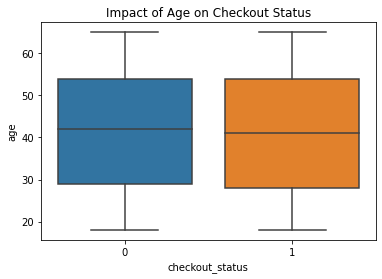

In [52]:
# Analyze the impact of age on checkout status
sns.boxplot(x='checkout_status', y='age', data=df)
plt.title('Impact of Age on Checkout Status')
plt.show()

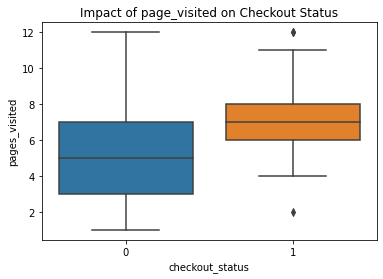

In [51]:
sns.boxplot(x='checkout_status', y='pages_visited', data=df)
plt.title('Impact of page_visited on Checkout Status')
plt.show()

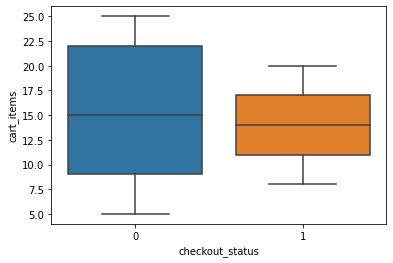

In [50]:
sns.boxplot(x='checkout_status', y='cart_items', data=df)
plt.show()

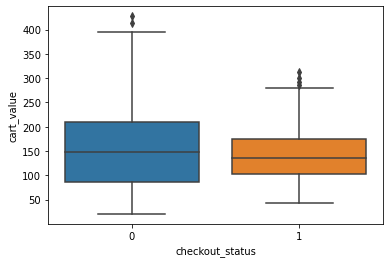

In [49]:
sns.boxplot(x='checkout_status', y='cart_value', data=df)
plt.show()

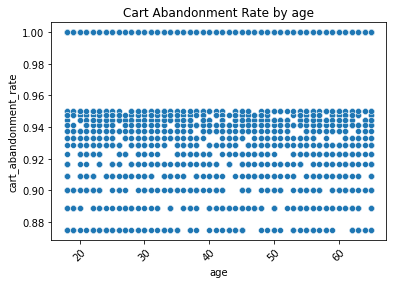

In [48]:
sns.scatterplot(x='age', y='cart_abandonment_rate', data=df)
plt.title('Cart Abandonment Rate by age')
plt.xticks(rotation=45)
plt.show()

In [58]:
df = pd.get_dummies(df, columns=['location'])

In [59]:
print(df.head())

   userID  age  sessions  time_spent  pages_visited  cart_items  cart_value  \
0       1   62         3   13.295129              2          20      199.21   
1       2   65         2   21.686405              3          21      294.82   
2       3   18         7   17.135220              4          23      240.87   
3       4   21         9   29.589311              8          16      183.78   
4       5   21         3   25.948584              4          10       59.51   

   checkout_status   device  time_spent_normalized  \
0                0  Desktop               0.138148   
1                0  Desktop               0.232432   
2                0  Desktop               0.181295   
3                1  Desktop               0.321228   
4                1   Tablet               0.280321   

   average_time_spent_per_session  cart_abandonment_rate age_group  \
0                        4.431710                 1.0000     60-70   
1                       10.843203                 1.0000    

In [60]:
from sklearn.preprocessing import StandardScaler

# Select the 'time_spent' column
time_spent = df['time_spent'].values.reshape(-1, 1)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the 'time_spent' column
scaled_time_spent = scaler.fit_transform(time_spent)

# Assign the scaled values back to the DataFrame
df['scaled_time_spent'] = scaled_time_spent

# Print the updated DataFrame
print(df.head())


   userID  age  sessions  time_spent  pages_visited  cart_items  cart_value  \
0       1   62         3   13.295129              2          20      199.21   
1       2   65         2   21.686405              3          21      294.82   
2       3   18         7   17.135220              4          23      240.87   
3       4   21         9   29.589311              8          16      183.78   
4       5   21         3   25.948584              4          10       59.51   

   checkout_status   device  time_spent_normalized  \
0                0  Desktop               0.138148   
1                0  Desktop               0.232432   
2                0  Desktop               0.181295   
3                1  Desktop               0.321228   
4                1   Tablet               0.280321   

   average_time_spent_per_session  cart_abandonment_rate age_group  \
0                        4.431710                 1.0000     60-70   
1                       10.843203                 1.0000    

In [63]:
# Select the 'time_spent' column
cart_value = df['cart_value'].values.reshape(-1, 1)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the 'time_spent' column
scaled_cart_value = scaler.fit_transform(cart_value)

# Assign the scaled values back to the DataFrame
df['scaled_cart_value'] = scaled_cart_value

# Print the updated DataFrame
print(df.head())


   userID  age  sessions  time_spent  pages_visited  cart_items  cart_value  \
0       1   62         3   13.295129              2          20      199.21   
1       2   65         2   21.686405              3          21      294.82   
2       3   18         7   17.135220              4          23      240.87   
3       4   21         9   29.589311              8          16      183.78   
4       5   21         3   25.948584              4          10       59.51   

   checkout_status   device  time_spent_normalized  \
0                0  Desktop               0.138148   
1                0  Desktop               0.232432   
2                0  Desktop               0.181295   
3                1  Desktop               0.321228   
4                1   Tablet               0.280321   

   average_time_spent_per_session  cart_abandonment_rate age_group  \
0                        4.431710                 1.0000     60-70   
1                       10.843203                 1.0000    